<a href="https://colab.research.google.com/github/Umerfarooq122/Predicting-diabetes-using-python/blob/main/Different_Classification_Models_and_there_performance_on_Big_and_Small_Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Diabetes Using Different Classification Machine Learning Models:**

# **Introduction:**

In this study we will look at different features that can help us predict the presense of Diabetes in a patients. We will use different classification machine learning models and check there performance on two data set of different dimensions. Our first data set contains apprpximately 800 observations with 8 features and our second data set contains approximately 70K observations with 17 features.

# **Loading The Data sets:**

## **Setting Up The Environment:**

Let's load the required libraries into out notebook that we will use in the analysis

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

## **Loading And Displaying The Datasets**

We will load our data sets and check out the first few rows to confirm that everything loaded into the notebook correctly.

In [2]:
df70k = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/Data_sets/main/diabetes_data.csv")

In [3]:
df70k.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


After checking out the first fews rows we can confirm that the the dataset 70k observation loaded correctly now let's check out the smaller data set.

In [4]:
df800 = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/Predicting-diabetes-using-python/main/diabetes.csv")

In [5]:
df800.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Everything looks good over here too. Let's carry on with Exploratory data analysis.

# **Exploratory Data Analysis**



## **Descriptive Summary:**

Before moving on with checking the relations among different features of the data set let's check out the desciptive summary of each data set. We can use describe meathod to get the mean, standard deviation, min and max of each column.

### **df70k:**

In [6]:
df70k.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


We can see that most of the columns have min = 0 while max = 1 which might give us an hint about the type of data. It could be a categorcial response for most of the columns.



In [7]:
print(df70k.dtypes)


Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object


We can see that all of our columns are data type float but when check the the uniques values as shown below:

In [8]:
print(df70k.nunique())

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64


We can see that only three features i.e. `BMI`,`MenHlth` and `PhysHlth` has more than two unique values which means that other features apart from these three has binary reponses and is already coded 0 and 1. This reduces our work for data preparation other wise we had to encode the categorical reponse to change into numerical either by using one-hot coding or any other technique. Havin said that we still have to change our data type from numerical to categorical during our data preparation stages for the models

### **df800:**

Similarly we can check out the desciptive summary, data types and uniqueness of response of smaller data set features too using the same techniques

In [9]:
df800.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that our smaller data set has mostly continuous responses while the bigger dataset only has categorical responses. So it will be interesting to see how they perform when they are fed into a machine learning model. let's check out the data types of each column of both data sets. lets check out the data types

In [10]:
print(df800.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


We can see that again our responses are numeric i.e. float and integer so let check the uniqueness of the values present in responses and see if there is a pre-coded categorical response

In [11]:
print(df800.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


We can see that apart from outcome column which our target variable none of the other columns which features has binary responses

## **Graphical Exploration Of Features:**

In this section we will visually analyze or explore all the features and check there distributions if its a continuous variable of class balance with bar plots if its a categorical varaible/feature.

In [12]:
features_binary = ['Age','Sex',	'HighChol',	'CholCheck',	'Smoker',	'HeartDiseaseorAttack',	'Fruits',	'Veggies',	'HvyAlcoholConsump',	'GenHlth',	'DiffWalk',	'Stroke',	'HighBP', 'Diabetes']
features_numerical = ['BMI', 'MentHlth', 'PhysHlth']
feat = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']

### **df70k:**

We will look at the larger data set set first

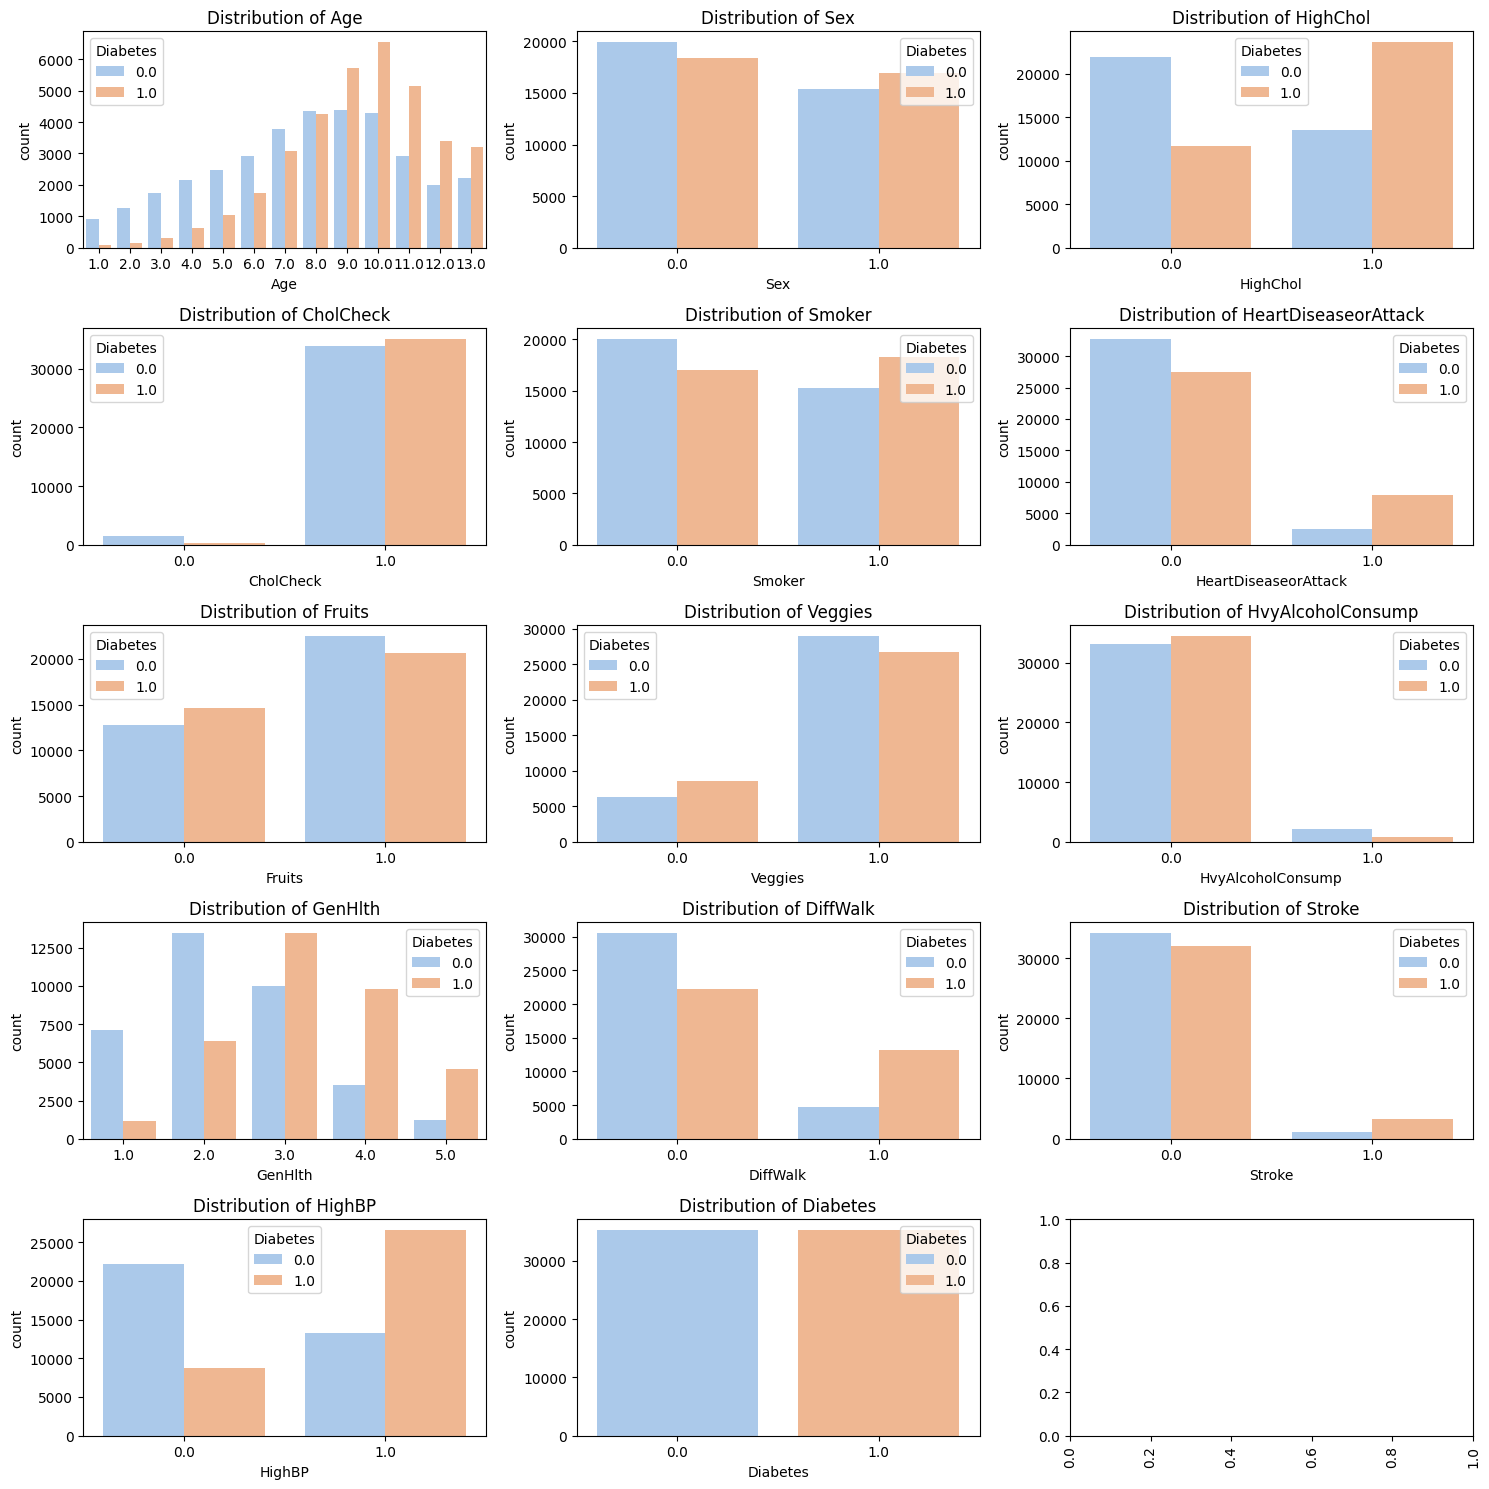

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(features_binary):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Diabetes', data=df70k, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Distribution of {feature}')
    plt.xticks(rotation = 90)

plt.tight_layout()

plt.show()

We can confirm that most of the features has binary reponses while some such as `Age` and `GenHlth` has more reponses than just binary. Overall there are pretty equal number of diabetic and non diabetic patient across the features. We can see that there is no class imbalance in the output response which is represented by `Diabetes` column. Let's check out the distribution of our continuous response

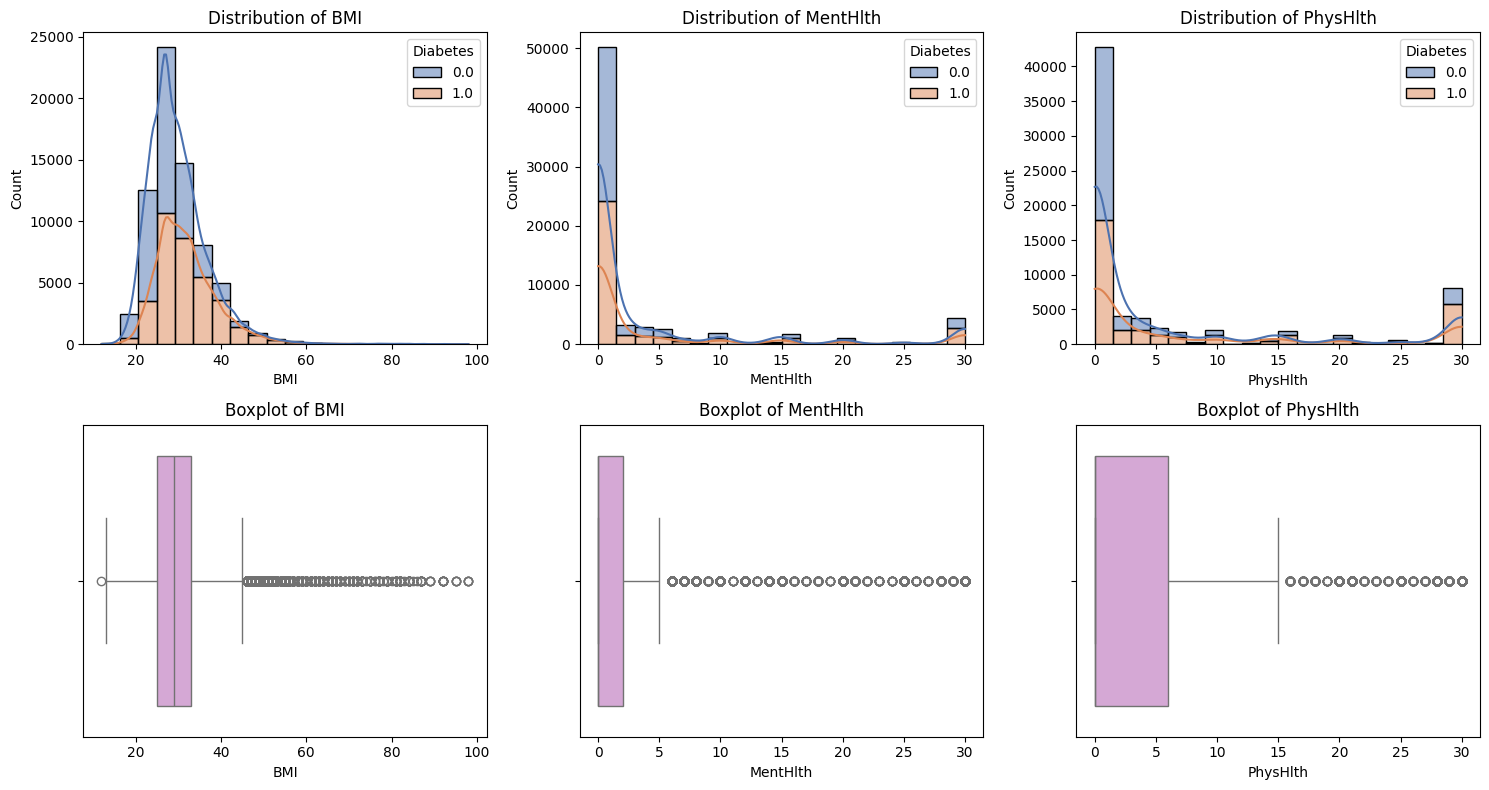

In [14]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features_numerical, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df70k, x=feature, kde=True, bins=20, hue='Diabetes', multiple='stack', palette='deep')
    plt.title(f'Distribution of {feature}')

    plt.subplot(2, 3, i + 3)
    sns.boxplot(x=df70k[feature], color='plum')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

We can see that non of the continous varaibles are normally distributed and are skewed right. a log transform might help in getting the disctribution closer to normal. All of the continuous variables have huge numbers of outliers which might cause problem in modeling

### **df800:**

Now similarly the smaller data set

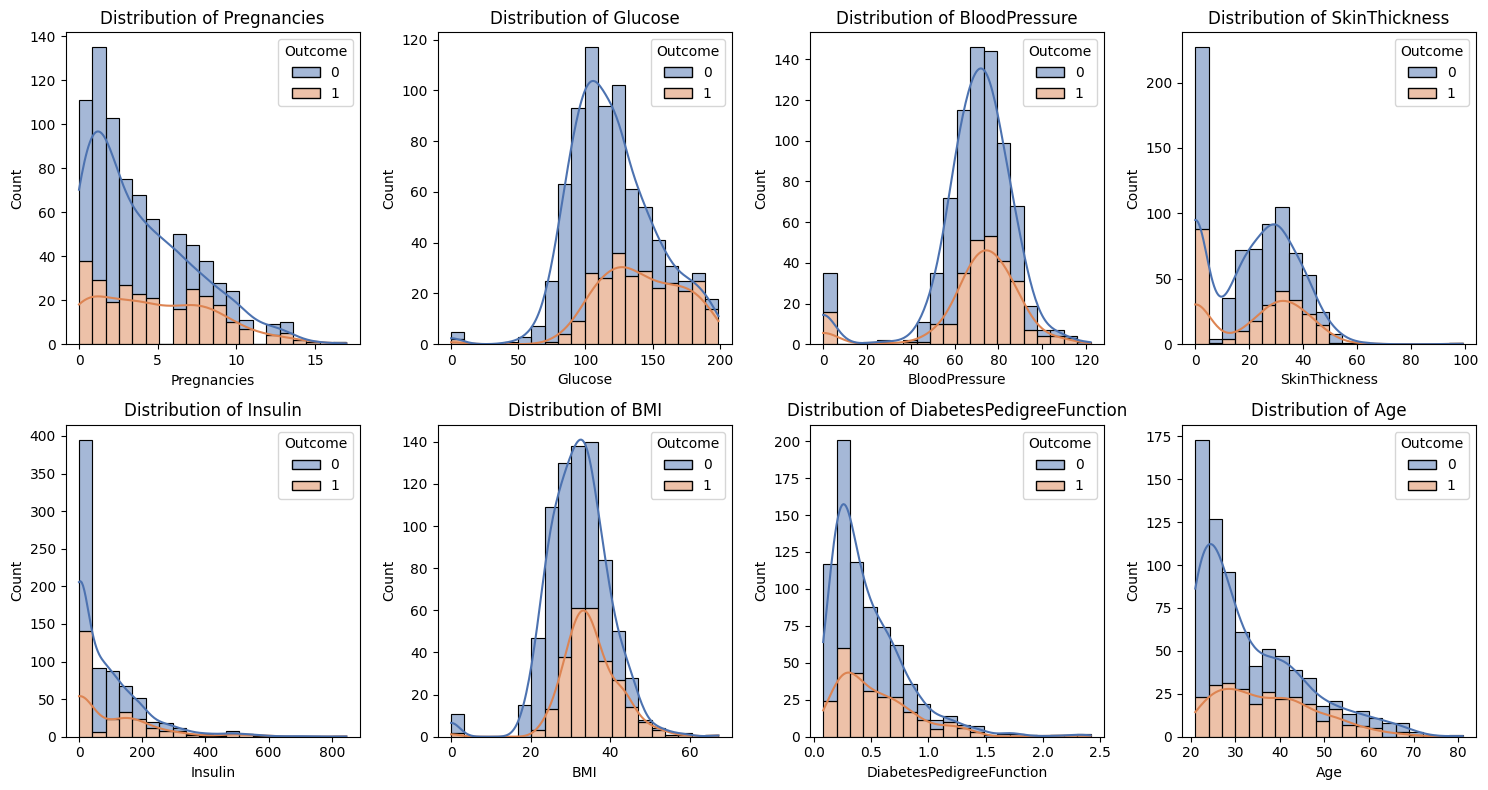

In [15]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(feat, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df800, x=feature, kde=True, bins=20, hue='Outcome', multiple='stack', palette='deep')
    plt.title(f'Distribution of {feature}')



plt.tight_layout()
plt.show()

Again in our smaller data set we can see that most of the features are right skewed apart from `BMI`,`Glucose` and `BloodPressure` which exhibits some what noraml behavior.

## **Correlations and associations:**

In this section we will be looking at correlations and associations among different features and with our response variable. So far we have established that our bigger data set i.e. 70k observation has mostly categorical variables as features and the response is also categorical so the normal pearson correlation will not make any and in fact we have to do chi-sqaured test to check the association among the features and response. But before doing that we have to change the data type to categorical.

### **df70k:**

In [16]:
df70k[['Age', 'Sex', 'HighChol',	'CholCheck',	'Smoker',	'HeartDiseaseorAttack',	'Fruits',	'Veggies',	'HvyAlcoholConsump',	'GenHlth',	'DiffWalk',	'Stroke',	'HighBP', 'Diabetes']] = df70k[['Age', 'Sex', 'HighChol',	'CholCheck',	'Smoker',	'HeartDiseaseorAttack',	'Fruits',	'Veggies',	'HvyAlcoholConsump',	'GenHlth',	'DiffWalk',	'Stroke',	'HighBP', 'Diabetes']].astype('category')

We can go ahead and check out the chi-sqaured values and we can also check the Cramer's V values and choose the one with highest values. This will give us a sense of the association between your categorical variables. Higher values indicate a stronger association. However, we have keep in mind that these measures indicate association, not necessarily causation.

In [17]:
from scipy.stats import chi2_contingency

chi2_results = pd.DataFrame(index=df70k.columns, columns=df70k.columns)
for col1 in df70k.columns:
    for col2 in df70k.columns:
        contingency_table = pd.crosstab(df70k[col1], df70k[col2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        chi2_results.loc[col1, col2] = chi2

# Calculate Cramér's V
n = df70k.shape[0]
cramer_v = chi2_results.apply(lambda x: x/n)

print("Chi-square statistics:")
print(chi2_results)
print("\nCramér's V:")
print(cramer_v)

Chi-square statistics:
                              Age           Sex      HighChol     CholCheck  \
Age                      848304.0     97.555604   5204.823279    836.897163   
Sex                     97.555604  70687.970248     21.147678      4.411683   
HighChol              5204.823279     21.147678  70687.989459    521.503951   
CholCheck              836.897163      4.411683    521.503951  70650.562181   
BMI                     4065.5118   2149.475049   2112.422908    286.603094   
Smoker                1149.975649    888.293149    616.289126      1.270475   
HeartDiseaseorAttack  3609.790417    680.608546   2319.696976     132.96155   
PhysActivity           778.017693    189.111445    577.989634      4.695206   
Fruits                 544.403757     556.10708    158.523578     21.133934   
Veggies                 59.330668    195.357265    129.505881      0.003994   
HvyAlcoholConsump       248.79059      14.04269      45.51051     51.233336   
GenHlth                   241

As we can see that `BMI`, `GenHlth` and `HighBP` has the highest or strongest association with diabetes based on chi-sqaured test and Cramer's V values. `Age`,`HeartDieseaseorAttack`, `DiffWalk`,`PhyActivity` amd `Stroke` also shows a stronger association with `Diabetes`

### **df800:**

<Axes: >

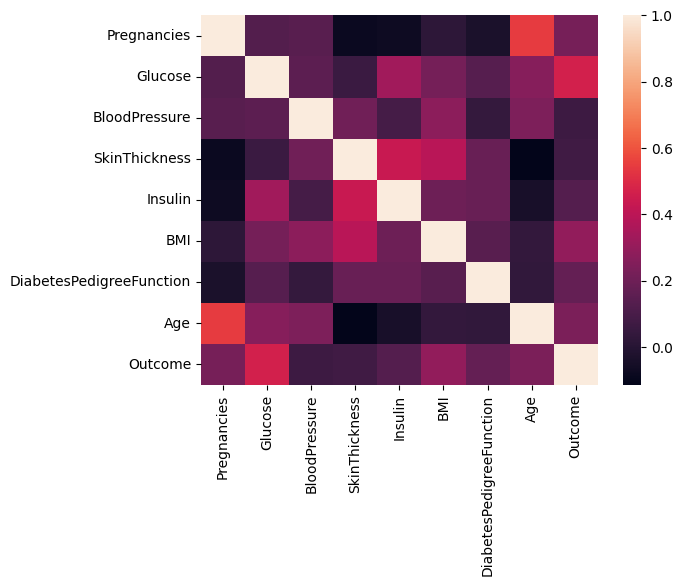

In [18]:
sns.heatmap(df800.corr())

As we can see that our `Outcome` column (response) has high correlation with features like `Glucose`, and `BMI`but at the same time we can see the high correlation among features like `Age` has higher correlation with `Pregnancies` and `BMI` has high correlation with `SkinThickness` so this can cause multi colinearity problems. Let's check out the variance inflation factor.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = df800.columns
vif_data["VIF"] = [variance_inflation_factor(df800.values, i) for i in range(len(df800.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                    Feature        VIF
5                       BMI  18.515112
1                   Glucose  18.030209
2             BloodPressure  15.313159
7                       Age  13.500531
3             SkinThickness   4.008709
0               Pregnancies   3.364416
6  DiabetesPedigreeFunction   3.213450
4                   Insulin   2.063940
8                   Outcome   1.948398


As we can see that features like `BMI`, `Glucose`, `BloodPressure` and `Age` has high VIF which indicates multi colinearity and could cause problem in modeling.

# **Data Preparation:**

In this section we will prepare both of our data set for the next section with modeling. Data preparation is crucial step in creating machine learning model

## **Handling Missing and Duplicate Values:**



### **df70k:**

In [20]:
print(df70k.isna().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


Well surprisingly this data set has no missing values. Usually when we get a real life data set from repositories like Kaggle, they are usually full of missing values and which can be job within a job sometimes but this time we got lucky. Let move one and check if there are any duplicate values in our data set.

In [21]:
print(df70k.duplicated().sum())

6672


Well we have 6672 duplicate values in our larger data set so let's rid of those.

In [22]:
df70k = df70k.drop_duplicates()
df70k.duplicated().sum()

0

### **df800:**

Let's Prepare the data of smaller data set. We will start with checking the missing values

In [28]:
print(df800.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


It seems this data set already preprocessed since there are no missing values. Let's check out the duplicate values

In [29]:
print(df800.duplicated().sum())

0


Perfect we dont have any duplicate values either so we can go ahead and create machine learning models

# **Machine Learning Models:**

## **df70k:**

### **Initial Models:**

In our initial models for the bigger data set we will use all the features for these models and see how they perform

In [23]:
X = df70k.drop(['Diabetes'], axis = 1)
y = df70k['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44814, 17)
(44814,)
(19206, 17)
(19206,)


In [7]:
models={'Gaussian NB':GaussianNB(),
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    #"Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=30)
}

Gaussian NB
Model performance for Training set
- Accuracy: 0.7179
- F1 score: 0.717600
- Precision: 0.717791
- Recall: 0.717923
----------------------------------
Model performance for Test set
- Accuracy: 0.7142
- Fl score: 0.7139
- Precision: 0.7139
- Recall: 0.7142
----------------------------------


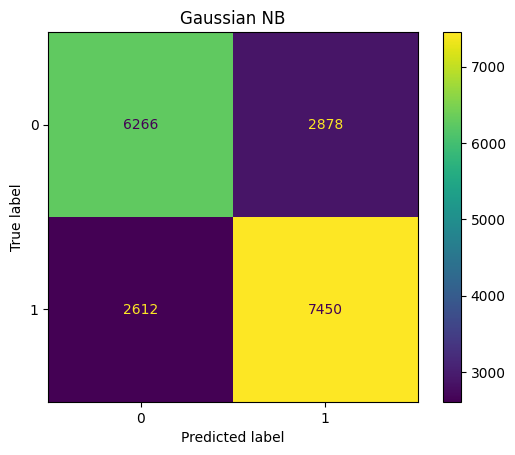



Logisitic Regression
Model performance for Training set
- Accuracy: 0.7371
- F1 score: 0.736585
- Precision: 0.737317
- Recall: 0.737136
----------------------------------
Model performance for Test set
- Accuracy: 0.7345
- Fl score: 0.7340
- Precision: 0.7344
- Recall: 0.7345
----------------------------------


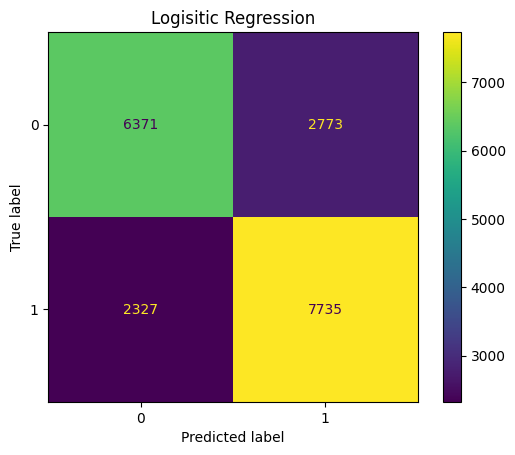



Decision Tree
Model performance for Training set
- Accuracy: 0.9787
- F1 score: 0.978677
- Precision: 0.979576
- Recall: 0.978667
----------------------------------
Model performance for Test set
- Accuracy: 0.6245
- Fl score: 0.6247
- Precision: 0.6250
- Recall: 0.6245
----------------------------------


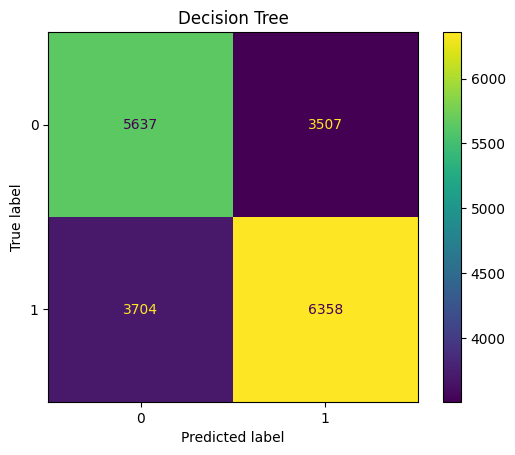



Random Forest
Model performance for Training set
- Accuracy: 0.9786
- F1 score: 0.978646
- Precision: 0.978648
- Recall: 0.978645
----------------------------------
Model performance for Test set
- Accuracy: 0.6971
- Fl score: 0.6959
- Precision: 0.6973
- Recall: 0.6971
----------------------------------


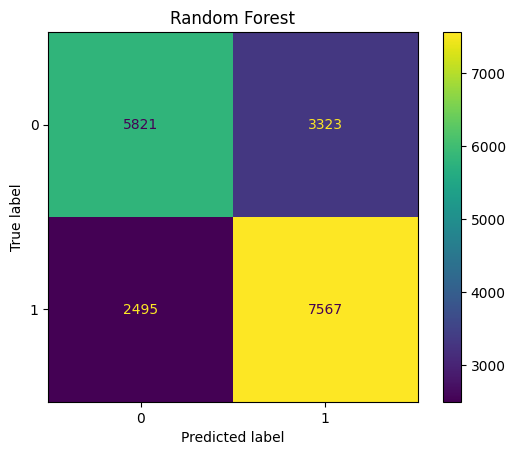



K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.7361
- F1 score: 0.735366
- Precision: 0.736556
- Recall: 0.736109
----------------------------------
Model performance for Test set
- Accuracy: 0.7109
- Fl score: 0.7101
- Precision: 0.7109
- Recall: 0.7109
----------------------------------


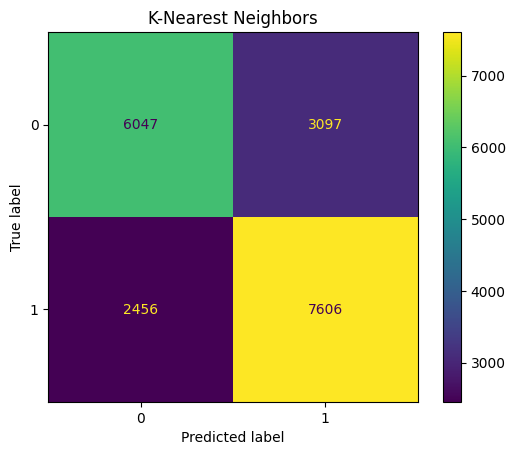

In [25]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    print('----------------------------------')

    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(list(models.keys())[i])
    plt.show()

    print('='*35)
    print('\n')

We ran classification machine learning models such as logistic regression, Decision trees, Random Forest and K-Nearest neighbors on the data 70% of data set as training and rest of the 30% as testing. We have used all the predictors to predict our response that is `Diabetes`. The expectation was that Random Forest might out perform all the other models since it is an ensemble technique. It does a very good job on the training data set but it gets outperformed by logistic regression and K-nearest nieghbors when put in test to a new data set i.e. testing data. The training accuracy of our Random Forest is 98% but when it comes to testing data which the new data the accuracy drops to 70% suggesting that we might be overfitting the model or it require some fine tuning. On the other hand the accuracy of logistic and KNN remains almost constant for both training and testing at around 73% and 71%, respectively. The Decision Trees perform good on training but fails to achieve good accuracy when it comes testing data. Naive Bayes also does an OKAY job by achieving the accuracy of 71%

### **Features Engineered Models:**

In this section we will only use select features that has stronger association with target variable and see how these different models perform. The features are selected base chi-sqaured test and Cramer's V test result. The features with lowest number are dropped from the model.

In [26]:
X = df70k.drop(['Diabetes','Sex', 'Smoker', 'MentHlth','Fruits','Veggies'], axis = 1)
y = df70k['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44814, 12)
(44814,)
(19206, 12)
(19206,)


Gaussian NB
Model performance for Training set
- Accuracy: 0.7201
- F1 score: 0.719546
- Precision: 0.720123
- Recall: 0.720087
----------------------------------
Model performance for Test set
- Accuracy: 0.7180
- Fl score: 0.7175
- Precision: 0.7179
- Recall: 0.7180
----------------------------------


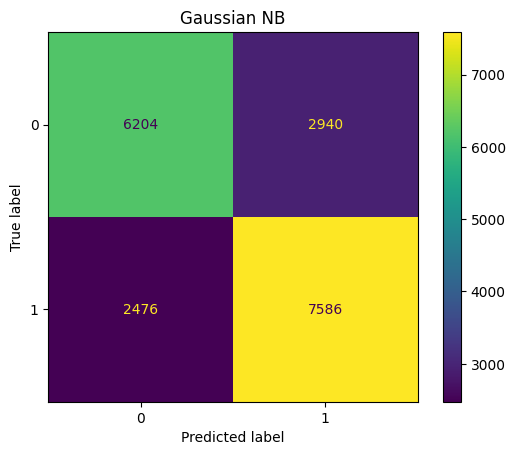



Logisitic Regression
Model performance for Training set
- Accuracy: 0.7352
- F1 score: 0.734673
- Precision: 0.735423
- Recall: 0.735239
----------------------------------
Model performance for Test set
- Accuracy: 0.7337
- Fl score: 0.7331
- Precision: 0.7337
- Recall: 0.7337
----------------------------------


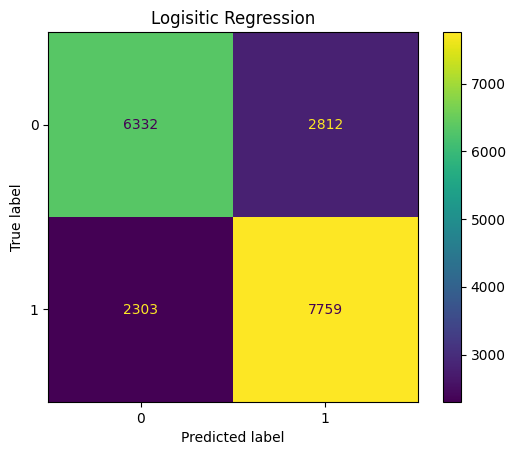



Decision Tree
Model performance for Training set
- Accuracy: 0.9039
- F1 score: 0.903893
- Precision: 0.906963
- Recall: 0.903892
----------------------------------
Model performance for Test set
- Accuracy: 0.6561
- Fl score: 0.6562
- Precision: 0.6589
- Recall: 0.6561
----------------------------------


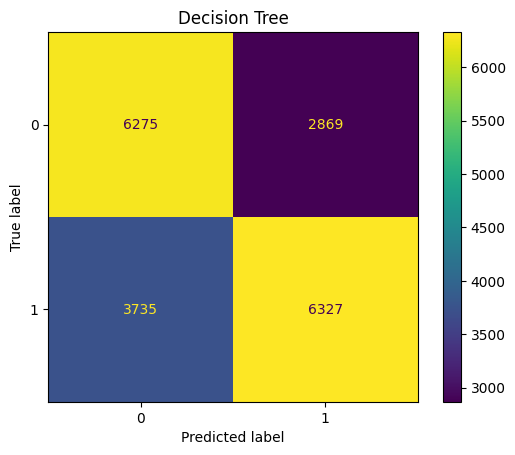



Random Forest
Model performance for Training set
- Accuracy: 0.9039
- F1 score: 0.903890
- Precision: 0.903888
- Recall: 0.903892
----------------------------------
Model performance for Test set
- Accuracy: 0.6930
- Fl score: 0.6925
- Precision: 0.6928
- Recall: 0.6930
----------------------------------


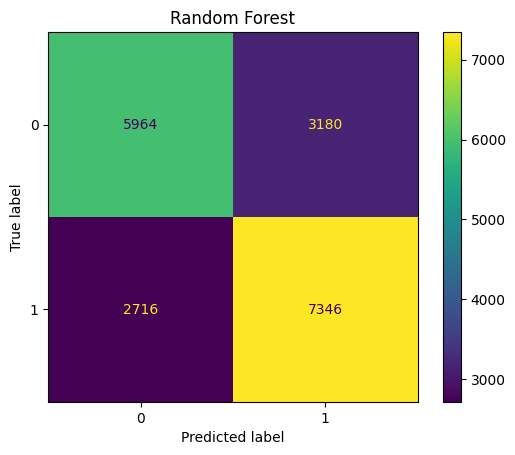



K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.7380
- F1 score: 0.737258
- Precision: 0.738368
- Recall: 0.737961
----------------------------------
Model performance for Test set
- Accuracy: 0.7226
- Fl score: 0.7218
- Precision: 0.7227
- Recall: 0.7226
----------------------------------


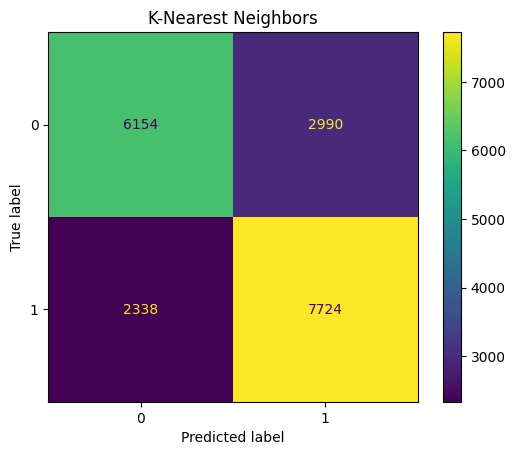

In [27]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    print('----------------------------------')

    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(list(models.keys())[i])
    plt.show()


    print('='*35)
    print('\n')

We can see that the accuracy of the models didnt improve or reduce suggesting that lower predictors or features could be use for this dataset since it lowers the computing time.

### **Fine Tuned Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.7392333723981126


Even after fine tuning the random forest its still can not improve the accuracy over 74% which suggests that logistic regression would be the right choice for a problem like this at hand. Now let's move on our smaller data set and how these models perform on that data.

## **df800:**

In this section we will apply different classification algorithms to our smaller data set

### **Initial Models:**



In [30]:
X = df800.drop(['Outcome'], axis = 1)
y = df800['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


Gaussian NB
Model performance for Training set
- Accuracy: 0.7672
- F1 score: 0.761717
- Precision: 0.761793
- Recall: 0.767225
----------------------------------
Model performance for Test set
- Accuracy: 0.7446
- Fl score: 0.7463
- Precision: 0.7487
- Recall: 0.7446
----------------------------------


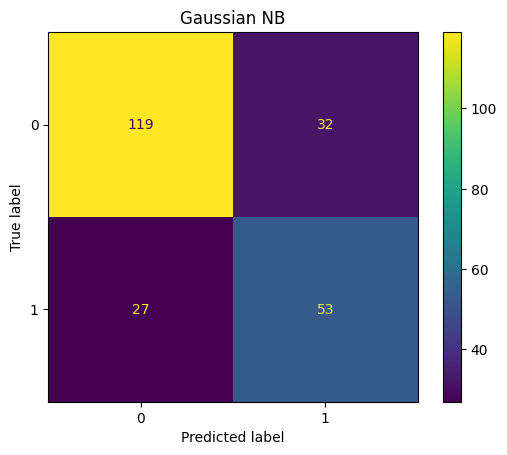



Logisitic Regression
Model performance for Training set
- Accuracy: 0.7840
- F1 score: 0.776981
- Precision: 0.779796
- Recall: 0.783985
----------------------------------
Model performance for Test set
- Accuracy: 0.7359
- Fl score: 0.7363
- Precision: 0.7367
- Recall: 0.7359
----------------------------------


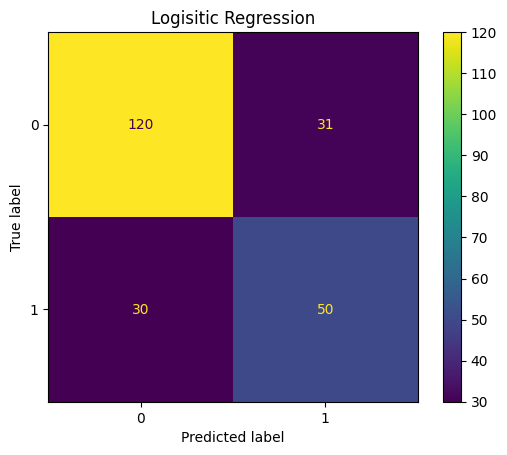



Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.7056
- Fl score: 0.7108
- Precision: 0.7226
- Recall: 0.7056
----------------------------------


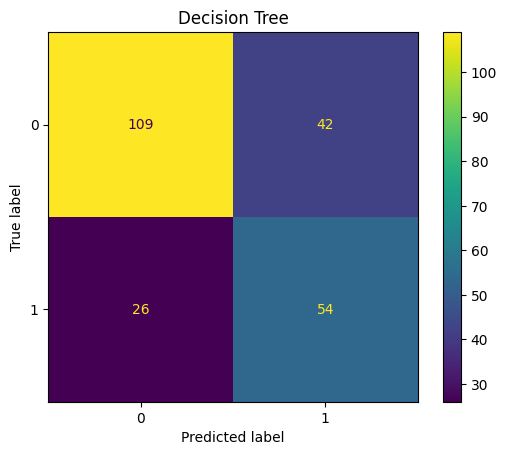



Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.7359
- Fl score: 0.7355
- Precision: 0.7352
- Recall: 0.7359
----------------------------------


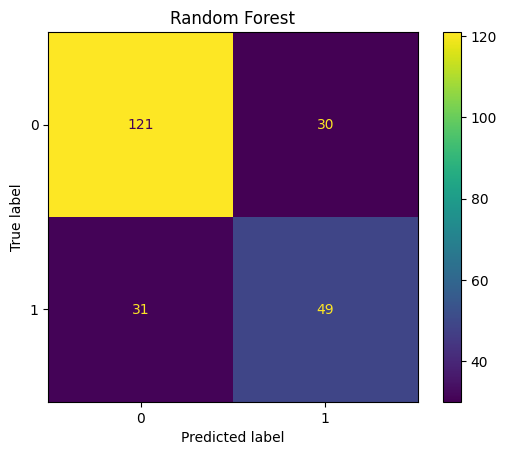



K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.7691
- F1 score: 0.749755
- Precision: 0.774161
- Recall: 0.769088
----------------------------------
Model performance for Test set
- Accuracy: 0.7316
- Fl score: 0.7128
- Precision: 0.7230
- Recall: 0.7316
----------------------------------


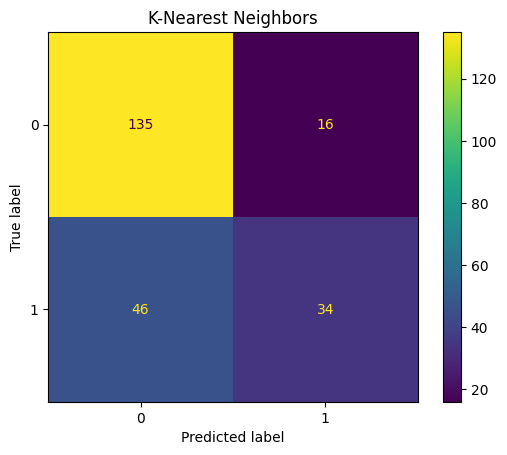

In [32]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    print('----------------------------------')

    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(list(models.keys())[i])
    plt.show()


    print('='*35)
    print('\n')

### **Features Engineered Models:**

Again in this section we will only chose features based on correlation and VIF scores

In [33]:
X = df800.drop(['Outcome','Age', 'BloodPressure'], axis = 1)
y = df800['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 6)
(537,)
(231, 6)
(231,)


Gaussian NB
Model performance for Training set
- Accuracy: 0.7654
- F1 score: 0.757755
- Precision: 0.759615
- Recall: 0.765363
----------------------------------
Model performance for Test set
- Accuracy: 0.7749
- Fl score: 0.7735
- Precision: 0.7726
- Recall: 0.7749
----------------------------------


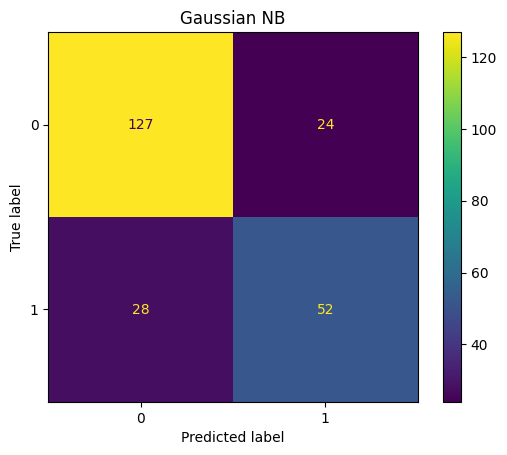



Logisitic Regression
Model performance for Training set
- Accuracy: 0.7765
- F1 score: 0.768354
- Precision: 0.772010
- Recall: 0.776536
----------------------------------
Model performance for Test set
- Accuracy: 0.7576
- Fl score: 0.7534
- Precision: 0.7522
- Recall: 0.7576
----------------------------------


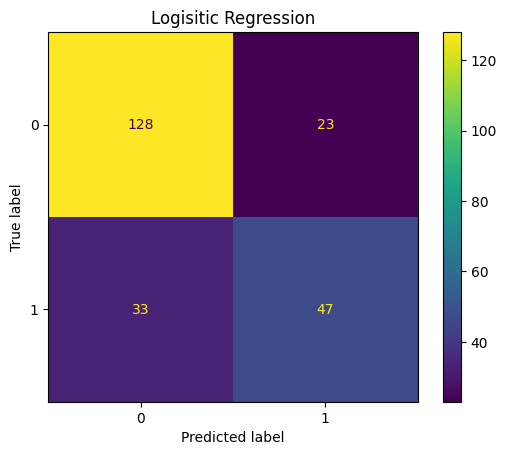



Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.7056
- Fl score: 0.7065
- Precision: 0.7074
- Recall: 0.7056
----------------------------------


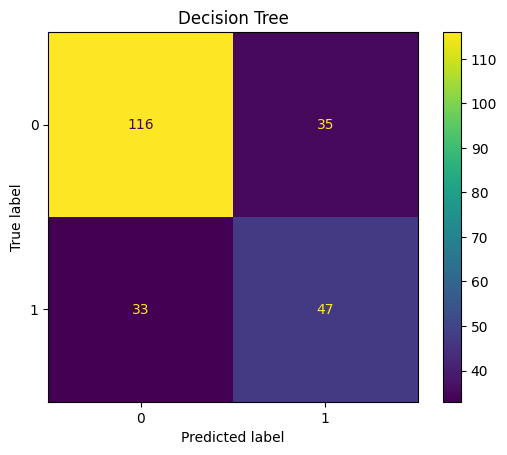



Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.7619
- Fl score: 0.7608
- Precision: 0.7600
- Recall: 0.7619
----------------------------------


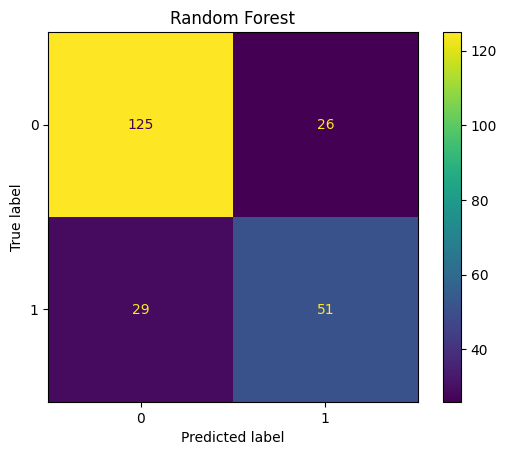



K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.7654
- F1 score: 0.747862
- Precision: 0.766512
- Recall: 0.765363
----------------------------------
Model performance for Test set
- Accuracy: 0.7359
- Fl score: 0.7216
- Precision: 0.7270
- Recall: 0.7359
----------------------------------


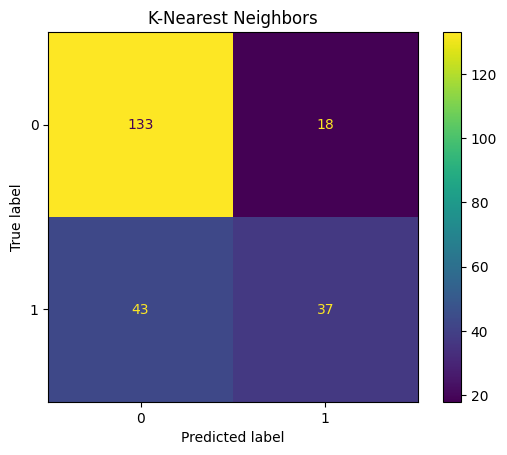

In [35]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    print('----------------------------------')

    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(list(models.keys())[i])
    plt.show()


    print('='*35)
    print('\n')

As we can see that by dropping the features that has highest VIF score and low correlation with `Outcome` we see an overall improvemnt in the accuracy of all the models with Random Forest outperforming other models by achieving accuracy of 76.2%. One thing should be kept in mind that so far we havent transformed any columns or features since some of our features distribution was right skewed. Transformation might help us achieve higher accuracies but for now we will try to fine tune randomn forest and see how far can we go with current provided data.

### **Models With Normalized data:**

In [5]:
from sklearn.preprocessing import StandardScaler

X = df800.drop(['Outcome','Age', 'BloodPressure'], axis = 1)
y = df800['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_normalized = scaler.transform(X_test)

In [10]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Gaussian NB
Model performance for Training set
- Accuracy: 0.7654
- F1 score: 0.757755
- Precision: 0.759615
- Recall: 0.765363
----------------------------------
Model performance for Test set
- Accuracy: 0.7749
- Fl score: 0.7735
- Precision: 0.7726
- Recall: 0.7749
----------------------------------


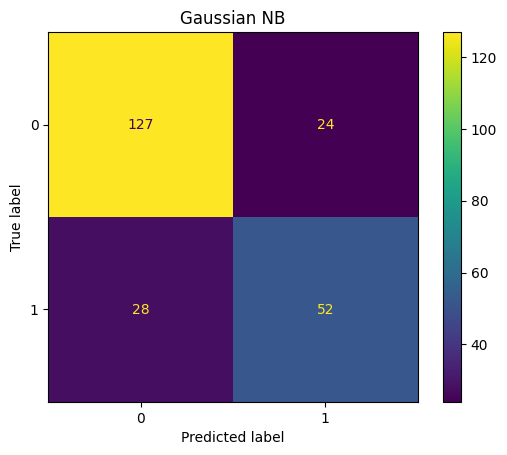



Logisitic Regression
Model performance for Training set
- Accuracy: 0.7803
- F1 score: 0.771739
- Precision: 0.776327
- Recall: 0.780261
----------------------------------
Model performance for Test set
- Accuracy: 0.7619
- Fl score: 0.7573
- Precision: 0.7564
- Recall: 0.7619
----------------------------------


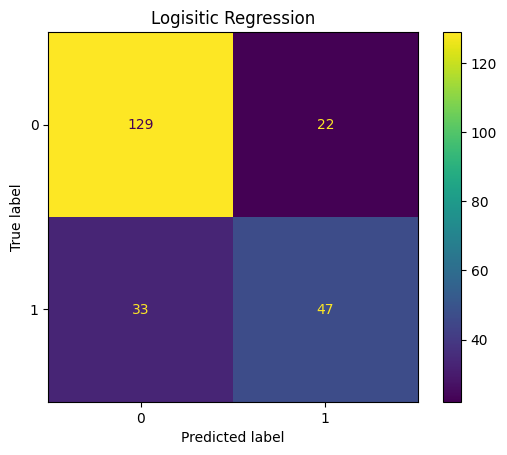



Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.7229
- Fl score: 0.7229
- Precision: 0.7229
- Recall: 0.7229
----------------------------------


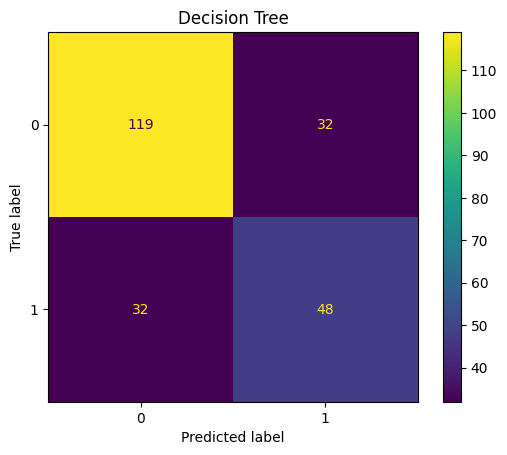



Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.7316
- Fl score: 0.7316
- Precision: 0.7316
- Recall: 0.7316
----------------------------------


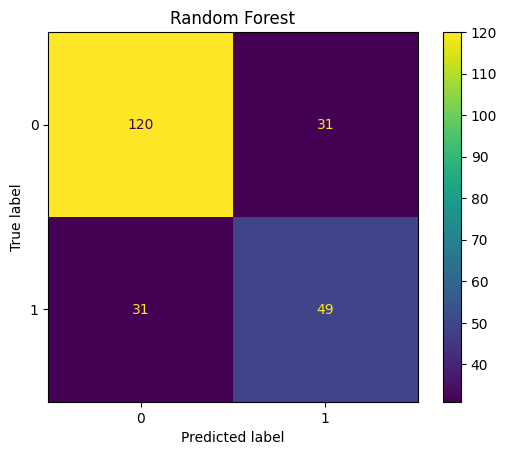



K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.7598
- F1 score: 0.741502
- Precision: 0.760004
- Recall: 0.759777
----------------------------------
Model performance for Test set
- Accuracy: 0.7749
- Fl score: 0.7646
- Precision: 0.7706
- Recall: 0.7749
----------------------------------


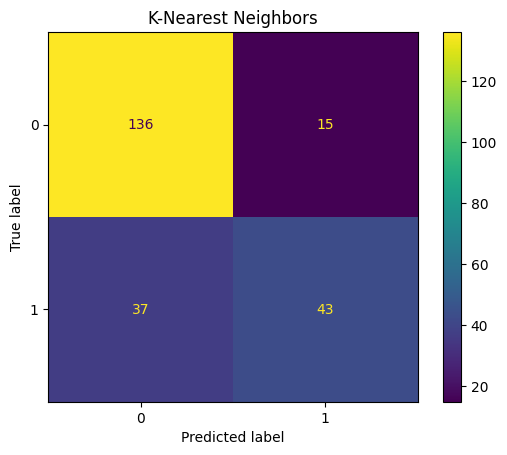

In [11]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_normalized,y_train.values.ravel()) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train_normalized)
    y_test_pred =  model.predict(X_test_normalized)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    print('----------------------------------')

    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(list(models.keys())[i])
    plt.show()


    print('='*35)
    print('\n')

Normalization does a good job and Naive Bayes get improved a lot. Logistic regression and KNN also performs better than before after normalization.

### **Tuned Randomn Forest**

In this section we will try to tune the hyper parameters with cross validation for random forest and see how much can we improve the accuracy of the model.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7653513326410523


We can see that if we fine tune random forest we can achieve a touch better accuracy but Naive Bayes and Logistic Regression performs better with normalized data.

# **Conclusion :**

In this study we took two real life data sets of different size to predict Diabetes. The larger data set had almost over 70K observation with 17 features while the smaller data set had 800 obervation with 8 features. The main difference among two data sets apart from size was the type of data. The outcome or the response for both the data set was binary i.e. Yes or No or 0 or 1 but the predictors of features for the larger data set was comprised of categorical response while for smaller data set it was continous response. since our output was binary so that means we had to apply a binary classsifier to create model. In that regard we explored both of our data set. Check the relationship among different features and there affect on outcome in exploratory data analysis. Followed by preprocessing data, but in our case we got lucky and our data sets were mostly preprocessed. Once the data set were ready they were put to classification machine learning algorithms like Naive Bayes, Logistic Regression, Decision Tree, Random Forest and K-nearest Neighbors. The performance of each model was assessed based on the accuracy achieve and in some cases Random Forest were further tuned to see how much improvement can be achieved provided the optimal hyper parameter were chosen. Overall Logistic regression was performing better on both data sets. No Transformation was carried out on any of the features from either dataset since the idea was to check the computational sophistication of alogrithms

# **Essay:**

**1. Are the columns of your data correlated?**

Well in our larger data set it was not a straightforward answer since all of our fetaures were categorical responses rather than continous reponse so checking the correlation among categorical variables isn't as straightforward as with numerical variables. Since categorical variables don't have a natural ordering like numerical variables, traditional correlation measures like Pearson correlation aren't applicable. So instead of Pearson correlation we did Chi-sqaured Test and Cramer's V. Higher values of both indicated a stronger association, however, we have to keep in mind that these measures indicate association, not necessarily causation. In the larger data set `BMI`, `GenHlth` and `HighBP` had the highest or strongest association with diabetes based on Chi-sqaured test and Cramer's V values. `Age`,`HeartDieseaseorAttack`, `DiffWalk`,`PhyActivity` amd `Stroke` also shows a stronger association with `Diabetes`. Our Smaller dataset had continuous features so we did check the Pearson Correlation. Features like `Glucose`, and `BMI`but at the same time we can see the high correlation among features like `Age` has higher correlation with `Pregnancies` and `BMI` has high correlation with `SkinThickness` so this can cause multi colinearity problems and the VIF did provided higher scores for those features.

**2. Are there labels in your data? Did that impact your choice of algorithm?**

The choice of algorithm can indeed be influenced by the presence of labels in the data. Our data contains labels adn is an examples of supervised learning, the popular supervised learning classification alogrithms are Logistic regession, Naive Bayes, Random Forest and Decision Tree e.t.c. We did use those algorithms. If our data did not contain labels, so will be performing unsupervised learning and the algorithms like K-Means Clustering, Hierarchical Clustering e.t.c. will be used.

**3. What are the pros and cons of each algorithm you selected?**

Well in this study I have tried mutiple classification alogrithms and compared there accuracies on training and Testing data set. I have use algorithms such as Logistic Regression, Decision Trees, Random Forests, Naive Bayes and KNN. Here are some of the pro and cons of each algorithm.

**Logistic Regression:**

The algorithm for logistic regression is straightforward and simple to use. It is capable of handling binary and multiclass classification jobs and offers well-calibrated probability. Additionally, it provides interpretability since feature significance may be indicated by coefficients which wqe have not discussed in this problem. Logistic regression coefficients for each features give us the log of odds for the outcome happening. The expressiveness of Logistic Regression in capturing intricate connections is limited, as it presumes a linear relationship between the target variable and features. Additionally, when handling nonlinear relationships in the data, it may perform poorly because to its sensitivity to irrelevant characteristics. But in this case it does outperform other techniques when it comes to New i.e. test data but it performs poorly on training data.

**Desicion Tress:**

Decision trees are perfect for comprehending the decision-making process since they are simple to understand and picture. They are capable of handling both category and numerical data, and they can successfully capture non-linear connections. But decision trees are prone to overfitting, particularly when dealing with deep trees, and even little changes in the data might result in distinct tree architectures. Furthermore, they tend to favor characteristics with greater levels and their greedy approach might not always produce globally optimum trees.

**Random Forest:**

Random Forests combine several trees to solve the overfitting problem with Decision Trees. They work well with real-world datasets because they are resistant to noise and outliers. Random Forests are useful for both regression and classification problems, and they can handle high-dimensional data without the requirement for feature scaling. They cost more to compute, though, and are harder to understand than individual decision trees. Additionally, because of memory and computational limitations, they could not function effectively with very big datasets.

**Naive Bayes:**

When dealing with high-dimensional data, the straightforward and computationally efficient Naive Bayes technique works effectively. It is resilient to unimportant features and elegantly manages missing values. Naive Bayes is especially useful for text classification jobs and may be taught with little data. Nevertheless, it may be less expressive in portraying intricate relationships because it makes the frequently erroneous assumption that elements are independent of one another. Additionally, it could have the "zero-frequency" issue and be feature distribution sensitive.

**K-nearest Neighbors:**

The K-Nearest Neighbors algorithm is easy to use and doesn't require any training. Because it is resilient to noisy data and non-parametric, it can handle complex decision boundaries. When it comes to multiclass classification problems, KNN works well. However, because it needs to calculate the distances to every training sample, it has a large computational cost during prediction. It requires careful consideration when deciding on the number of neighbors (K), as it is susceptible to irrelevant dimensions and attributes. Furthermore, because of the dimensionality curse, KNN struggles with high-dimensional data and needs a large enough training set to produce reliable predictions.



**4. How your choice of algorithm relates to the datasets (was your choice of algorithm impacted by the datasets you chose)?**

Honestly speaking in this study I just wanted to compared most of the classification model that we have studied so far and see how they performs on both data set. In our case we see that random forest perform better on training data while logistic regression, KNN and Naive Bayes performs better on testing data when it comes to accracy of predictions.

**5. Which result will you trust if you need to make a business decision?**

Ideally, one would rely or trust more on sophisticated techniques such Random Forest which is an ensemble techniques and removes over fitting problem that occurs in Decision Trees but in this case we clearly see that even Random Forest gives and accuracy of over 90% when it comes to the training data but it does not perform as good on testing data which means that our algorithm is getting used to the training data too much and is over fitting and every time new data comes along the accuracy drop below 70%. On the other hand algorithms like Logistic Regression performs equally well on training and testing data suggesting that it will keep the same accuracies when put in test to new data. I will Chose Logistic Regression for this problem if im using both data set

**6. Do you think an analysis could be prone to errors when using too much data, or when using the least amount possible?**

Well in this case larger and smaller data set pretty much give the same number of misclassification for all algorithms leaving 1 or 2 %. However this might not be the case all the time. I feel like it will really come down the quality of data collected and sampled followed by properly selecting and tuning the hyper parameters of the model. Generally speaking, overfitting occurs when a model attempts to fit too much data and ends up capturing noise or random oscillations in the data instead of the true patterns. When utilizing too little data, this might result in underfitting, which occurs when the model is unable to identify the underlying patterns in the data, and poor generalization performance on unknown data. As a result, models may be extremely basic and perform poorly in terms of prediction.

Similarly Analyzing large datasets may require significant computational resources, leading to longer processing times and increased computational costs while with insufficient data, it may be challenging to generalize findings or conclusions beyond the specific dataset used for analysis

**7. How does the analysis between data sets compare?**

Well in our case if we bring it down to classsification model metrics such as accuracy, F1 score and recall e.t.c. so both of the data sets gave us the accuracy around 70% but we have to bear in mind that the larger data set had categorical features while smaller data set had continuous features. So it relatively easier to transform and check the correlation among features and response for data set with continuous values rather than categorical. We alos a lot more features for the alrger data set which can at times make it difficult for the algorithm to train model too.